## Introduction



**In this python notebook, we will discuss and analyse the data for show / no show appointment i.e what features can help understand the patients would show up or not We will explore the following**

1. Data Wrangling
    - get the basic understanding of the data, modify / remove some columns, map some categorical variables 
2. Exploratory Data Analysis
    - In this section, we will basically answer 2 main questions simultaneously by analysing the data, estimating probability and plotting graphs 
        - Which features might be responsible for Show / No Show Cause
        - What is the probability for these features for Show / No Show Cause
3. Conclusion
    - We would concluse our findings about the data and mention some of the constraints and limitations being made while the exploration of data 



## PART I: Data Wrangling
Here we are going to import the releavent libraries and, read the csv file and try to understand the data i.e 
- understand what columns are there
- see if there are any NULL or NA values
- see basic statistical properties related to the data
- change the columns as per requirement 
- map categorical columns into quantitative values

#### import the libraries

In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#### read the csv file

In [199]:
file = pd.read_csv("/Users/sudhakargoyal/Downloads/noshowappointments-kagglev2-may-2016.csv")

###### take a look at the first 5 rows of the dataset to figure out how the data looks like

In [200]:
file.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


##### looking a some basic statistical properties related to the data 

In [201]:
file.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [202]:
file.info()    # checking the information of the read data i.e checking what columns 
              # are there along with the data types and the amount of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [203]:
file.shape     # shape of the data -> rows x columns

(110527, 14)

#### check if there is null / NA data

In [204]:
file.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [205]:
file.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

#### creating a new file so as do the operations on the same and keeping the original file intact 

In [206]:
file_new = file.copy()


In [207]:
file_new = file_new.drop(["PatientId", "AppointmentID"], axis=1)  
# dropping 2 columns -> Patient ID and Appointment ID as these are not playing any role in understanding the
# data in depth. THese are just incremental numbers

##### We will map some of the categorical columns here
- status -> No takes value 0 and Yes becomes 1
- Gender -> Male is represented by 0 and Female by 1
- Neighbourhood -> different cities would be represented by different numbers based on the numbers of cities present

In [208]:
status = {"No":0, "Yes":1}
file_new.columns
status_gender = {"M":0, "F":1}

In [209]:
neighbors = file_new.Neighbourhood.unique()    # find the number of unique neighbourhood cities
neighbor_status = {}                           # dictioanry to store the same
for i, j in enumerate((neighbors)):
    neighbor_status[j] = i
#neighbor_status


##### mapping each column based on the map status we have set in the above cells

In [210]:
file_new["No-show"] = file_new["No-show"].map(status)    # mapping no Show column
file_new.Gender = file_new.Gender.map(status_gender)     # mapping Gender 
file_new.Neighbourhood = file_new.Neighbourhood.map(neighbor_status)   # mapping Neighbourhood

In [211]:
file_new.head()    # critical feaures / columns are now quantitative 

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,1,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,0,1,0,0,0,0,0
1,0,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,0,0,0,0,0
2,1,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,1,0,0,0,0,0,0,0
3,1,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,2,0,0,0,0,0,0,0
4,1,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,0,0,1,1,0,0,0,0


In [212]:
 # grouping by relevant columns to see the total size of the particular feature

print(file_new.groupby('Neighbourhood').size())  
print("----------------")

print(file_new.groupby('No-show').size())
print("----------------")

print(file_new.groupby('Hipertension').size())
print("----------------")

print(file_new.groupby('Diabetes').size())


Neighbourhood
0     3877
1      644
2       69
3      835
4      700
      ... 
76     258
77     135
78       8
79       2
80       1
Length: 81, dtype: int64
----------------
No-show
0    88208
1    22319
dtype: int64
----------------
Hipertension
0    88726
1    21801
dtype: int64
----------------
Diabetes
0    102584
1      7943
dtype: int64


## Part 2. Data Exploration 
##### In this part, we are going to address 2 basic questions
- **Which features might be responsible for No Show Cause**
- **What is the probability for these features for Show / No Show Cause**

Both the questions will be addressed simultaneously while doing the analysis

array([[<AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Neighbourhood'}>],
       [<AxesSubplot:title={'center':'Scholarship'}>,
        <AxesSubplot:title={'center':'Hipertension'}>,
        <AxesSubplot:title={'center':'Diabetes'}>],
       [<AxesSubplot:title={'center':'Alcoholism'}>,
        <AxesSubplot:title={'center':'Handcap'}>,
        <AxesSubplot:title={'center':'SMS_received'}>],
       [<AxesSubplot:title={'center':'No-show'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

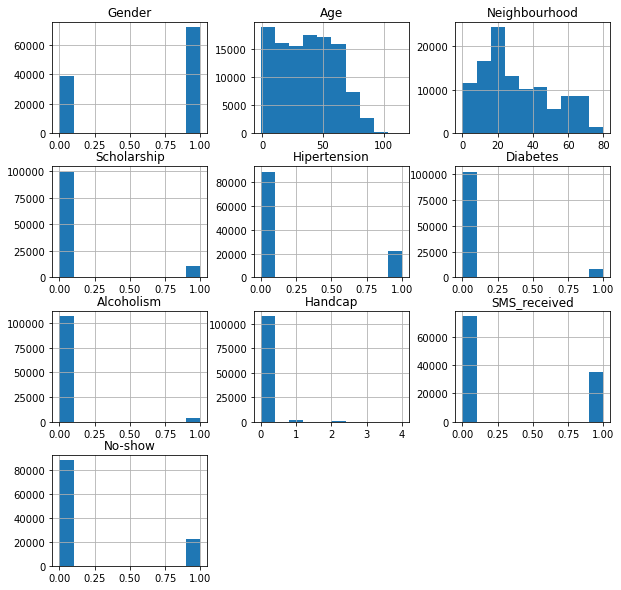

In [213]:
# plotting histogram of different variable to understand the distribution of data. This will also be helpful
# to get a sense of whether the data is normally distributed or is skewed and whether it is unimodal / bimodal 
# multimodal

file_new.hist(figsize=(10,10))


##### Above, we have plot histograms of different variables to understand the distribution of data. This will also be helpful to get a sense of whether the data is normally distributed or is skewed and whether it is unimodal / bimodal or multimodal

Text(0.5, 1.0, 'Outlier anaysis of Age')

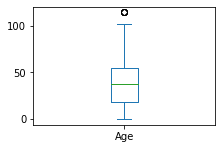

In [214]:
# plotting a box plot to check for the outliers -> taking the maximum ( Q3 + 1.5 IQR) as the limit and removing 
# rest of the points which will be considered as outliers

file_new.Age.plot(kind='box', subplots=True, layout=(4,4), figsize=(15,10))
plt.title("Outlier anaysis of Age")

##### Above graph shows a box plot for Age. we will consider age between 0 and 100 as we can see the outliers above the age of 100 in the above graph. 

In [215]:
file_new = file_new[(file_new.Age >= 0) & (file_new.Age <= 100)]
file_new.shape 

(110519, 12)

##### with the current format, we cannot comsider dates of appointment and schedule for analysis, therefore, we would convert the same in relevant date and time format using the numpy datetime function


In [216]:
file_new.AppointmentDay = file_new.AppointmentDay.apply(np.datetime64)
file_new.ScheduledDay = file_new.ScheduledDay.apply(np.datetime64)


In [217]:
file_new.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,1,2016-04-29 18:38:08,2016-04-29,62,0,0,1,0,0,0,0,0
1,0,2016-04-29 16:08:27,2016-04-29,56,0,0,0,0,0,0,0,0
2,1,2016-04-29 16:19:04,2016-04-29,62,1,0,0,0,0,0,0,0
3,1,2016-04-29 17:29:31,2016-04-29,8,2,0,0,0,0,0,0,0
4,1,2016-04-29 16:07:23,2016-04-29,56,0,0,1,1,0,0,0,0


In [218]:
# we can also explicitly take time and date separtely and store them in variables and create new columns if required
time = [file_new.ScheduledDay[0].time()]
date = [file_new.ScheduledDay[0].date()]

#file_new["Scheduled_Day_"] = [d.date() for d in file_new['ScheduledDay']]
#file_new["Scheduled_Time"] = [d.time() for d in file_new['ScheduledDay']]

#### Try to find the difference between the appointment date and the scheduled date to  understand if the difference between the two can also help us to predict the No show appearance of the patients

In [219]:
days_to_appointment = file_new.AppointmentDay - file_new.ScheduledDay
days_to_appointment = days_to_appointment.apply(lambda x: x.total_seconds() / (3600 * 24)) # converting to days based on the time as well


In [220]:
days_to_appointment = days_to_appointment.astype(int)   # converting days to appointment to integer values
days_to_appointment 
file_new["Days_to_Appointment"] = days_to_appointment

In [221]:
file_new.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Days_to_Appointment
0,1,2016-04-29 18:38:08,2016-04-29,62,0,0,1,0,0,0,0,0,0
1,0,2016-04-29 16:08:27,2016-04-29,56,0,0,0,0,0,0,0,0,0
2,1,2016-04-29 16:19:04,2016-04-29,62,1,0,0,0,0,0,0,0,0
3,1,2016-04-29 17:29:31,2016-04-29,8,2,0,0,0,0,0,0,0,0
4,1,2016-04-29 16:07:23,2016-04-29,56,0,0,1,1,0,0,0,0,0


#### Which features look the most prominent for helping to figure out the No show case

###### We will try to plot bar graphs trying to understand the variation of different features with respect to the No SHow feature.

In [222]:
# this function helps to plot one feature again another and see the number representing each Show and No Show category
def bivariate_analysis(feature, compare_feature, bins):
    dat = pd.cut(feature, bins=bins)
    comp_result = pd.crosstab(dat, compare_feature)
    comp_result.div(comp_result.sum(1), axis=0).plot(kind="bar", stacked=True)
    print(dat.value_counts())

#### Calculate probability for the Show case based on a category like Age, Neighbourhood, etc

In [223]:
def probability(prob_show, prob_no_show):
    for i in range(len(prob_show)):
        if ( (prob_show[i]) + (prob_no_show[i])!=0 ):
            prob_show[i] /= (prob_show[i]) + (prob_no_show[i]) 
            prob_show[i]*=100
        
    return prob_show


### Age as a factor for Show up / No Show Up

/Users/sudhakargoyal/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distributio of Age')

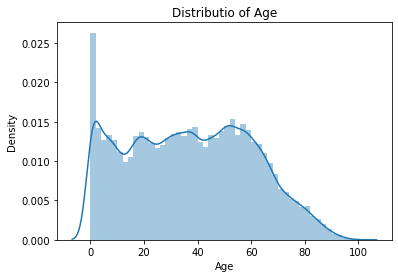

In [224]:
sns.distplot(file_new.Age)       # looking at the distribution of Age to get some basic visual understanding 
plt.title("Distributio of Age")

##### it is clearly visible from the graph that maximum number of patients are from the age group of 0 -1 years  and then there is a constant number till 60 years and then the number of patients fall post 60years

(-0.1, 3.333]       8943
(56.667, 60.0]      6107
(36.667, 40.0]      6100
(46.667, 50.0]      6058
(16.667, 20.0]      5978
(26.667, 30.0]      5749
(6.667, 10.0]       5497
(50.0, 53.333]      4964
(53.333, 56.667]    4590
(33.333, 36.667]    4484
(30.0, 33.333]      4468
(43.333, 46.667]    4400
(3.333, 6.667]      4309
(20.0, 23.333]      4177
(60.0, 63.333]      4029
(40.0, 43.333]      3962
(23.333, 26.667]    3857
(13.333, 16.667]    3731
(63.333, 66.667]    3619
(66.667, 70.0]      3541
(10.0, 13.333]      3390
(70.0, 73.333]      2035
(76.667, 80.0]      1969
(73.333, 76.667]    1717
(80.0, 83.333]      1106
(83.333, 86.667]     846
(86.667, 90.0]       592
(90.0, 93.333]       205
(93.333, 96.667]      74
(96.667, 100.0]       22
Name: Age, dtype: int64


Text(0.5, 1.0, 'Probability of show / no show with respect to Age')

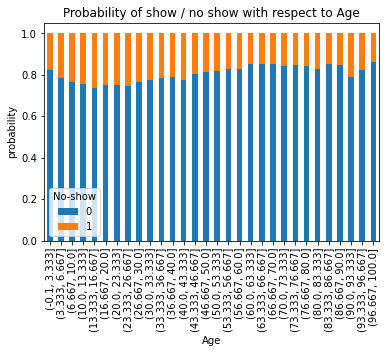

In [225]:
bins = 30
bivariate_analysis(file_new.Age,file_new["No-show"], bins, )  # bivariate analysis for Age based on 50 bins 
plt.ylabel("probability")
plt.title("Probability of show / no show with respect to Age")

##### We can clearly see that there is some variation and age does present a case for no show case -> From the graph it seems that minimum 70 % people show up from any age group but let us confirm the same with numbers

In [226]:
# we create two variables -> oen for shpw probability and another for no show probability and find the show and no show
# frequency for each age to furthe calculate the probability

prob_show = [0]*101
prob_no_show = [0]*101
for i, j in file_new.iterrows():
    if (j["No-show"]) == 0:
        prob_show[j.Age]+= 1
    else:
        prob_no_show[j.Age]+=1



In [227]:
# calculating probability to see the number of patients showing up for appointment 

for i in range(len(prob_show)):
    prob_show[i] /= (prob_show[i]) + (prob_no_show[i]) 
    prob_show[i]*=100


##### We will plot the probability to confirm 70% people of each age group show up for appointment. Peope in the age group of 98-100 are very low and all of them showed up for appointment. 

Text(0.5, 1.0, 'Distribution of probability of showing wrt Age')

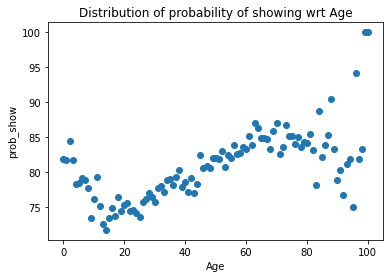

In [228]:
plt.scatter(range(len(prob_show)), prob_show)
plt.xlabel("Age")
plt.ylabel("prob_show")
plt.title("Distribution of probability of showing wrt Age")

In [229]:
print(prob_show)
min(prob_show)  # to see the minimum prob of showing up in all the probabilities 

[81.94405199208816, 81.74219093708754, 84.42521631644006, 81.69200264375414, 78.29099307159353, 78.50906648757555, 79.22419460881, 78.90679747722494, 77.6685393258427, 73.46938775510205, 76.138147566719, 79.3305439330544, 75.0915750915751, 72.52946509519492, 71.73524150268337, 73.41040462427746, 74.82168330955777, 73.75745526838966, 76.46267652992603, 74.49838187702265, 75.29575504523312, 75.55096418732782, 74.49127906976744, 74.57375833951076, 74.15458937198068, 73.57357357357357, 75.68199532346064, 76.10748002904866, 77.07182320441989, 76.47897362794012, 75.7396449704142, 77.76233495482975, 78.00664451827242, 77.16535433070865, 78.89908256880734, 79.02757619738752, 78.22784810126582, 79.32159165035877, 80.35604665438919, 77.86458333333334, 78.53067047075606, 77.11738484398218, 79.16666666666666, 77.00892857142857, 78.27841291190316, 82.45010323468685, 80.6164383561644, 80.84648493543759, 80.6290207290922, 81.96125907990314, 81.9590824550527, 81.94001276324187, 82.9896907216495, 80.67

71.73524150268337

### Days_to_Appointment as a factor for Show up / No Show Up


/Users/sudhakargoyal/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Days to Appointment')

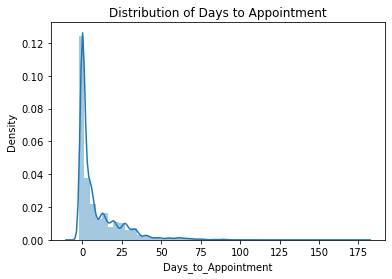

In [230]:
sns.distplot(file_new.Days_to_Appointment)   
plt.title("Distribution of Days to Appointment")

##### The above plot is a dist plot to understand the frequency. It shows most people register for the same day appointment 


(-6.184, 12.4]    79859
(12.4, 30.8]      20955
(30.8, 49.2]       6577
(49.2, 67.6]       2028
(67.6, 86.0]        792
(86.0, 104.4]       192
(159.6, 178.0]       45
(104.4, 122.8]       35
(122.8, 141.2]       24
(141.2, 159.6]       12
Name: Days_to_Appointment, dtype: int64


Text(0.5, 1.0, 'Probability of show / no show with respect to Days to Appointment')

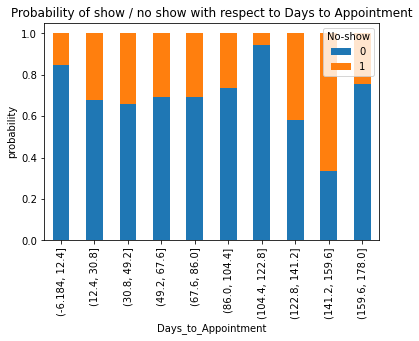

In [231]:
bins = 10
bivariate_analysis(file_new.Days_to_Appointment,file_new["No-show"], bins)# bivariate analysis with No show column
plt.ylabel("probability")
plt.title("Probability of show / no show with respect to Days to Appointment")

##### The above graph shows the distribution of Show and No show cases based on Days to Appointment. Days to Appointment has been binned and represented accordingly

In [232]:
days_to_appointment.info()

<class 'pandas.core.series.Series'>
Int64Index: 110519 entries, 0 to 110526
Series name: None
Non-Null Count   Dtype
--------------   -----
110519 non-null  int64
dtypes: int64(1)
memory usage: 5.7 MB


In [233]:
prob_show_app = [0]*179   # prob show app size is one greater than the maximum number in days_to_appointment i.e 179
prob_no_show_app = [0]*179
for i, j in file_new.iterrows():
    if (j["No-show"]) == 0:
        prob_show_app[j.Days_to_Appointment]+= 1
    else:
        prob_no_show_app[j.Days_to_Appointment]+=1

In [234]:
probability(prob_show_app, prob_no_show_app)  # calculating the probability based on Days to Appointment

[93.36348890868801,
 76.17489589530042,
 76.52650822669104,
 76.72967863894141,
 73.39029600244126,
 75.20435967302453,
 73.31838565022422,
 71.26929674099486,
 72.58566978193146,
 68.36808051761322,
 68.38905775075987,
 68.3408071748879,
 68.13317479191439,
 68.65774116031582,
 66.57789613848203,
 69.50477845351868,
 68.38301716350497,
 69.44172380019589,
 65.22988505747126,
 65.62763268744735,
 69.10263299301451,
 65.55839727195226,
 66.42335766423358,
 62.21864951768489,
 59.811616954474104,
 64.0218878248974,
 68.41066140177689,
 70.5158264947245,
 67.30945821854912,
 73.4375,
 67.26190476190477,
 64.84641638225256,
 66.56626506024097,
 66.58415841584159,
 62.72066458982347,
 68.96551724137932,
 64.04833836858006,
 66.16161616161617,
 67.64705882352942,
 59.4488188976378,
 64.61988304093568,
 63.06954436450839,
 70.07874015748031,
 70.06369426751591,
 63.503649635036496,
 63.63636363636363,
 69.72477064220183,
 70.94017094017094,
 65.27777777777779,
 73.07692307692307,
 63.73626373

#### It is pretty clear that the people who register on the same day of the appointment have the highest probability of showing up 

##### Analysing the other features like Alcoholism, Diabetes, Handcap, gender and scholarship. It would be noted that these features do not play any role in helping to understand the behaviour for show / no show up

(-0.001, 0.1]    107159
(0.9, 1.0]         3360
(0.1, 0.2]            0
(0.2, 0.3]            0
(0.3, 0.4]            0
(0.4, 0.5]            0
(0.5, 0.6]            0
(0.6, 0.7]            0
(0.7, 0.8]            0
(0.8, 0.9]            0
Name: Alcoholism, dtype: int64


Text(0.5, 1.0, 'Probability of show / no show with respect to Alcoholism')

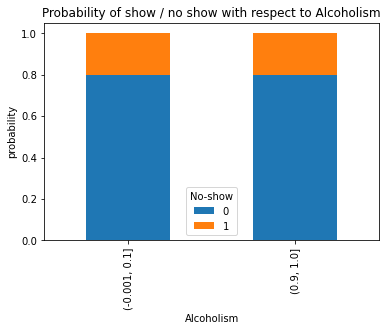

In [235]:
bivariate_analysis(file_new.Alcoholism, file_new["No-show"], 10)
 # analysis for Alcoholism data
plt.ylabel("probability")
plt.title("Probability of show / no show with respect to Alcoholism")

#####  The above graph shows that probability for both being alcoholic and non-alcoholic is the same and does not represent clearly if a patient would not show up due to some reason. The probability of showing up even when alcoholic is high as depicted from the graph

(-0.004, 2.0]    110503
(2.0, 4.0]           16
Name: Handcap, dtype: int64


Text(0.5, 1.0, 'Probability of show / no show with respect to handcap')

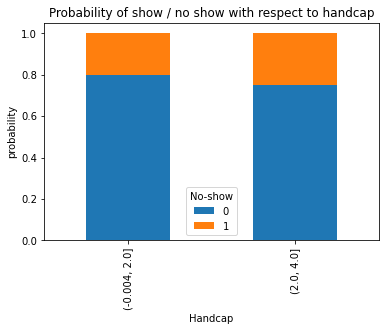

In [236]:
bivariate_analysis(file_new.Handcap, file_new["No-show"], 2)
    # # analysis for Handcap data
plt.ylabel("probability")
plt.title("Probability of show / no show with respect to handcap")

##### There is not much information given about Handcap feature. The probability of showing up even when handcap is high as depicted from the graph. The above graph shows that probability for showing up for both being handcap is almost same and does not represent clearly if a patient would not show up due to some reason. 


(-0.001, 0.1]    102576
(0.9, 1.0]         7943
(0.1, 0.2]            0
(0.2, 0.3]            0
(0.3, 0.4]            0
(0.4, 0.5]            0
(0.5, 0.6]            0
(0.6, 0.7]            0
(0.7, 0.8]            0
(0.8, 0.9]            0
Name: Diabetes, dtype: int64


Text(0.5, 1.0, 'Probability of show / no show with respect to Diabetes')

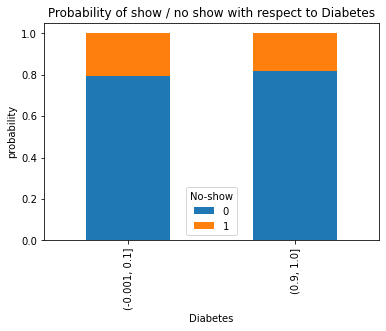

In [237]:
bivariate_analysis(file_new.Diabetes, file_new["No-show"], 10)   # # analysis for Diabetes data
plt.ylabel("probability")
plt.title("Probability of show / no show with respect to Diabetes")

##### There is not much information given about Diabetes feature. The probability of showing up even when Diabetic is high as depicted from the graph. The above graph shows that probability for showing up for both being Diabetic / non Diabetic is almost same and does not represent clearly if a patient would not show up due to some reason. 


(0.9, 1.0]       71832
(-0.001, 0.1]    38687
(0.1, 0.2]           0
(0.2, 0.3]           0
(0.3, 0.4]           0
(0.4, 0.5]           0
(0.5, 0.6]           0
(0.6, 0.7]           0
(0.7, 0.8]           0
(0.8, 0.9]           0
Name: Gender, dtype: int64


Text(0.5, 1.0, 'Probability of show / no show with respect to Gender')

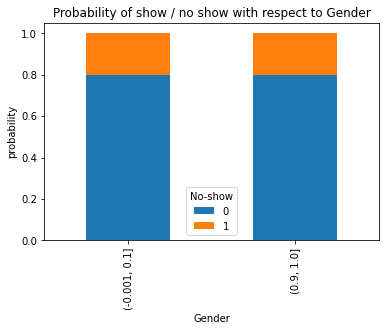

In [238]:
bivariate_analysis(file_new.Gender, file_new["No-show"], 10)    # analysis for Gender data
plt.ylabel("probability")
plt.title("Probability of show / no show with respect to Gender")

#####  The probability of showing up even doesn't depend on the gender as depicted by the graph. The probability of showing up for both the genders is the same. 

(-0.001, 0.1]    99658
(0.9, 1.0]       10861
(0.1, 0.2]           0
(0.2, 0.3]           0
(0.3, 0.4]           0
(0.4, 0.5]           0
(0.5, 0.6]           0
(0.6, 0.7]           0
(0.7, 0.8]           0
(0.8, 0.9]           0
Name: Scholarship, dtype: int64


Text(0.5, 1.0, 'Probability of show / no show with respect to Scholarship')

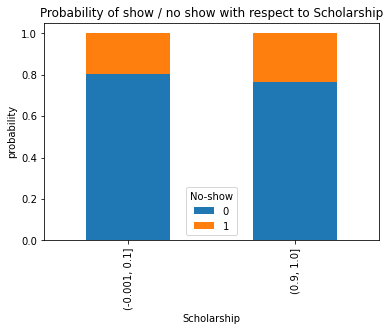

In [239]:
bivariate_analysis(file_new.Scholarship, file_new["No-show"], 10)  # analysis for scholarship data
plt.ylabel("probability")
plt.title("Probability of show / no show with respect to Scholarship")

#####  The probability of showing up even doesn't depend on the Scholarship as depicted by the graph. The probability of showing up in both the cases seem similar. Moreover, there is not much information provided about this -> therefore, the feature engineering is also not possible 

### Days_to_Appointment as a factor for Show up / No Show Up


Text(0.5, 1.0, 'Disctribution of Neighborhood')

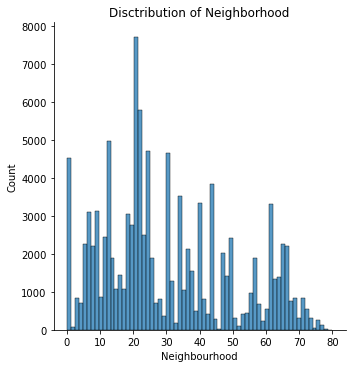

In [240]:
sns.displot(file_new.Neighbourhood)   # dispolot to see the frequency of neighbourhood data
plt.title("Disctribution of Neighborhood")

(20.0, 21.0]    7717
(21.0, 22.0]    5804
(-0.08, 1.0]    4521
(24.0, 25.0]    4431
(33.0, 34.0]    3514
                ... 
(74.0, 75.0]      35
(45.0, 46.0]      10
(77.0, 78.0]       8
(78.0, 79.0]       2
(79.0, 80.0]       1
Name: Neighbourhood, Length: 80, dtype: int64
Note-> the bins can be reduced in case the x label is not clear


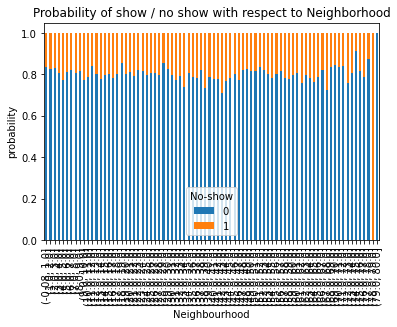

In [247]:

bivariate_analysis(file_new.Neighbourhood, file_new["No-show"], 80)  # comaprison with the No show feature 
plt.ylabel("probability")
plt.title("Probability of show / no show with respect to Neighborhood")
print("Note-> the bins can be reduced in case the x label is not clear")

##### There is not much variability in data as all the cities show similar results for Show up and No show up. But let us go through the probability numbers as well

In [248]:
prob_show_neigh = [0]*81   # prob show app size is one greater than the maximum number in days_to_appointment i.e 179
prob_no_show_neigh = [0]*81
for i, j in file_new.iterrows():
    if (j["No-show"]) == 0:
        prob_show_neigh[j.Neighbourhood]+= 1
    else:
        prob_no_show_neigh[j.Neighbourhood]+=1

In [249]:
probability(prob_show_neigh, prob_no_show_neigh)

[83.72452927521279,
 82.91925465838509,
 82.6086956521739,
 82.87425149700599,
 80.42857142857143,
 77.0593445527015,
 81.13207547169812,
 82.24381625441696,
 80.64952638700947,
 81.70498084291188,
 77.50582750582751,
 78.9624183006536,
 84.15841584158416,
 80.22875816993465,
 77.70767613038907,
 79.73856209150327,
 80.05559416261293,
 78.05788982259571,
 80.24115130299494,
 85.28784648187633,
 80.16588532275513,
 81.01593883633537,
 78.9972432804962,
 82.02471104025508,
 81.54981549815497,
 79.55314827352741,
 80.84880636604774,
 80.835734870317,
 79.85436893203884,
 85.44474393530997,
 82.37436270939548,
 79.86366019926587,
 77.17391304347827,
 79.21348314606742,
 73.73363688104723,
 80.88930936613056,
 78.94736842105263,
 78.34008097165992,
 82.29233741146169,
 73.51778656126481,
 78.91421715656868,
 77.68079800498752,
 77.72397094430993,
 71.08150470219435,
 76.95906432748538,
 78.01418439716312,
 80.0,
 77.40336967294351,
 81.92011212333567,
 82.77616279069767,
 81.64251207729468,

##### The proability distribution for the neighbourhood data is pretty similar for all the cities. They do not present any case for being correlated to No show data

### Part 3 Conclusion
- We have analysed the Show/No show data where we saw that Age and Days to Appointment ( Scheduled Date - Appointment Date) play decent role in understanding with what probablility do they affect the No Show Status for a Patient.

- People who **register for the same day appointment have the highest probabolity of ~94% to show for appointment**. The data is right skewed which means that mostly people register for appointment within 50 days of actual appointment. 

- Also, age is not a very significant factor. However, **people in the age group 0-1 yrs have the highest data for visiting a doctor and the probability based on age for showing up for any age is above 70%**

- For other criterias like **Diabetes, Alcoholism, etc**, they do not play any role in determining when a patient would show up or not. 



##### Limitations of current exploration 
- Currently, we have not looked at the Days of the week for exploration which would play a good role in deciding whether patients like to show up during weekends or weekdays
- we have just calculated simple probability for verifying the graph results and taking a deeper look into the probability numbers. However, we should consider calculating conditional probability / posterior proability to get a better idea.
- Morevover, there hasn't been much information about some columns like Diabetes, Alcoholism, etc and therefore, no feature engnineering was possible. More information would have helped to find correlation between different columns/ features and that would have helped create better understanding of the data. 
